In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

def init_player_markers(ax, unique_players, play_data):
    player_markers = {}
    team_colors = {
        'DEN': 'orange', 'SEA': 'green', 'TB': 'red', 'DAL': 'navy',
        'TEN': 'lightblue', 'NYG': 'blue', 'MIN': 'purple', 'GB': 'green',
        'LV': 'black', 'LAC': 'yellow', 'KC': 'red', 'ARI': 'darkred',
        'JAX': 'teal', 'WAS': 'burgundy', 'NYJ': 'green', 'BAL': 'purple',
        'MIA': 'aqua', 'NE': 'navy', 'IND': 'blue', 'HOU': 'darkblue',
        'PHI': 'darkgreen', 'DET': 'blue', 'CIN': 'orange', 'PIT': 'yellow',
        'SF': 'red', 'CHI': 'darkorange', 'CLE': 'brown', 'CAR': 'lightblue',
        'NO': 'black', 'ATL': 'red', 'BUF': 'blue', 'LA': 'blue'
    }
    football_color = 'brown'

    try:
        for player_id in unique_players:
            if pd.isna(player_id):
                player_markers[player_id] = ax.plot([], [], 'o', color=football_color, 
                                                  markersize=10, label='Football')[0]
            else:
                # Handle potential KeyError if player's team is not found
                player_data = play_data[play_data['nflId'] == player_id]
                if not player_data.empty:
                    team = player_data['club'].iloc[0]
                    color = team_colors.get(team, 'gray')  # Use gray as fallback color
                    player_markers[player_id] = ax.plot([], [], 'o', color=color)[0]
        
        return player_markers
    except Exception as e:
        print(f"Error initializing player markers: {str(e)}")
        raise

def update_player_positions(frame, play_data, player_markers):
    try:
        current_frame_data = play_data[play_data['frameId'] == frame]
        
        for player_id, marker in player_markers.items():
            player_data = current_frame_data[
                pd.isna(current_frame_data['nflId']) if pd.isna(player_id) 
                else (current_frame_data['nflId'] == player_id)
            ]
            
            if not player_data.empty:
                x, y = player_data['x'].iloc[0], player_data['y'].iloc[0]
                marker.set_data(x, y)
        
        return list(player_markers.values())
    except Exception as e:
        print(f"Error updating positions for frame {frame}: {str(e)}")
        return []

def animate_play(df, gameId, playId):
    try:
        # Input validation
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input 'df' must be a pandas DataFrame")
        
        required_columns = ['gameId', 'playId', 'frameId', 'nflId', 'x', 'y', 'club']
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"DataFrame missing required columns: {missing_columns}")
        
        # Filter data
        play_data = df[(df['gameId'] == gameId) & (df['playId'] == playId)]
        if play_data.empty:
            raise ValueError(f"No data found for game {gameId}, play {playId}")
        
        # Extract unique players
        unique_players = play_data['nflId'].unique()
        
        # Set up the plot
        plt.style.use('dark_background')  # Better visibility
        fig, ax = plt.subplots(figsize=(15, 8))
        ax.set_xlim(0, 120)
        ax.set_ylim(0, 53.3)
        ax.set_title(f"Game {gameId}, Play {playId} - Player Movement", pad=15)
        ax.grid(True, alpha=0.3)
        
        # Add field markers
        for i in range(0, 120, 10):
            ax.axvline(x=i, color='white', alpha=0.2)
            ax.text(i + 5, 2, str(i), ha='center', color='white', alpha=0.5)
        
        # Initialize markers
        player_markers = init_player_markers(ax, unique_players, play_data)
        
        # Create animation
        anim = FuncAnimation(
            fig, 
            update_player_positions,
            frames=sorted(play_data['frameId'].unique()),
            fargs=(play_data, player_markers),
            blit=True,
            interval=100,
            repeat=True
        )
        
        plt.tight_layout()
        plt.show()
        return anim
        
    except Exception as e:
        print(f"Error in animate_play: {str(e)}")
        plt.close()  # Clean up any partial figure
        raise


In [2]:
# Example usage
# Load the tracking_week.csv
df = pd.read_csv('tracking_week_1.csv')

<IPython.core.display.Javascript object>


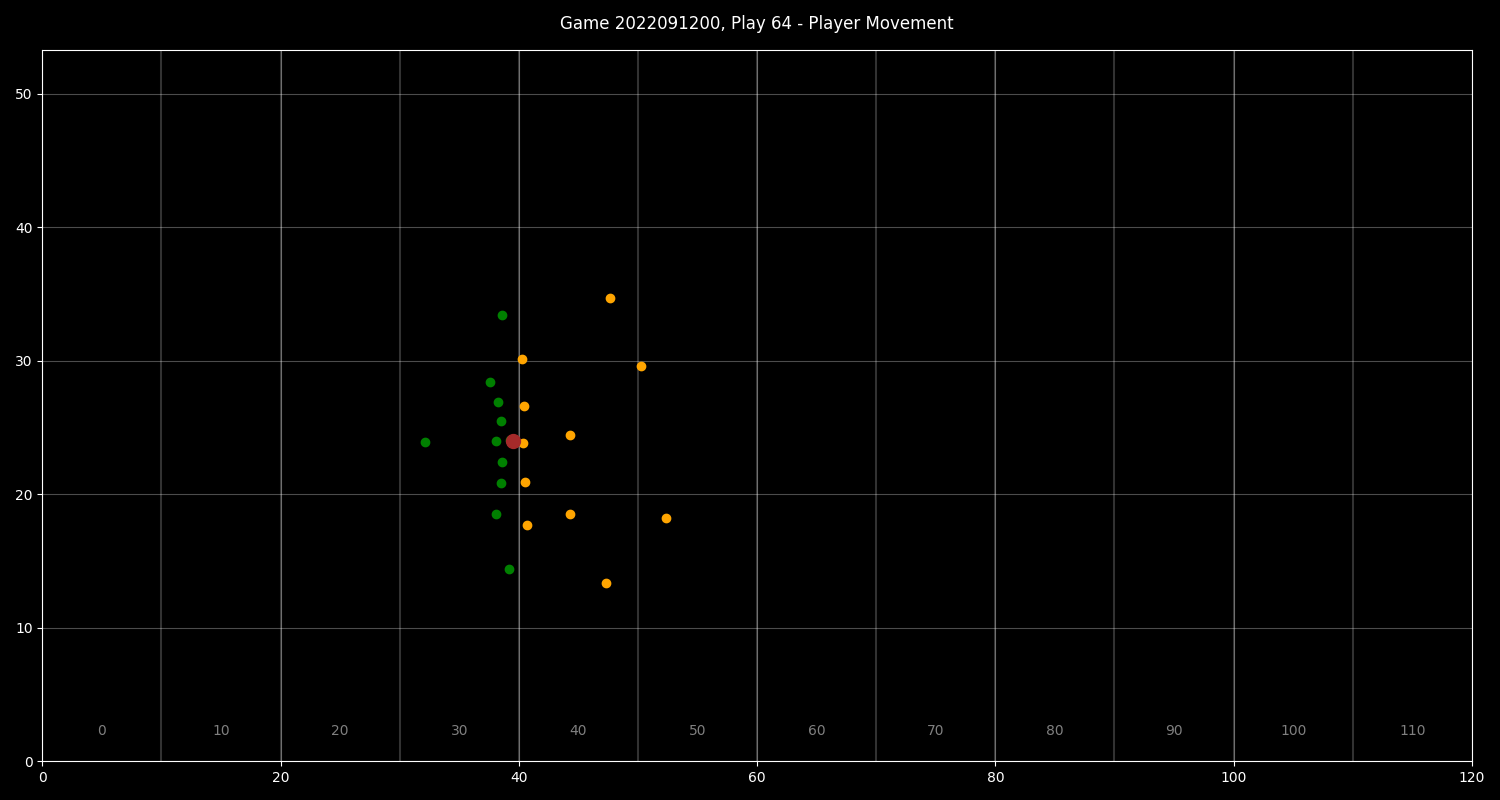

In [5]:
# Animate a play with all players and football
animate_play(df, gameId=2022091200, playId=64)